## Sustitución por valores arbitrarios  ==> Feature Engine


### Qué es Feature Engine?

Feature Engine es una librería de python que hemos creado para apoyar este curso. 

- Feature Engine incluye todas las técnicas de ingeniería de varaibles descritas en este curso
- Feature Engine funciona como Scikit-learn, por lo tanto es fácil de aprender
- Feature Engine te permite implementar pasos de ingeniería de variables espeficos para segmentos de datos específicos
- Feature Engine puede ser integrado con los flujos de trabajo de Scikit-learn pipeline permitiendo construir modelos facilmente
- 
**Feature Engine te permite diseñar y guardar un flujo de ingeneria de variables con procesos disenados especificamente para los diferentes grupos de variables.**

-------------------------------------------------------------------
Feature Engine puede ser instalado vía pip ==> pip install feature-engine

- Asegurate que haz instalado feature-engine antes de correr este notebook

Para más detalle visita nuestro website


## En este demo:

Vamos a usar **Feature Engine para hacer la sustitución por valores arbitrarios** usando los datos Ames House Price.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahi el nombre dado a la clase.




In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#  feature engine
from feature_engine import missing_data_imputers as mdi

In [42]:
# carguemos los datos con unas columnas seleccionadas

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [43]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

Todas las variables predictivas tienen datos ausentes

In [44]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables (features)

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 6), (438, 6))

## Feature Engine captura las variables numéricas automáticamente

In [45]:
# llamemos el imputer de feature engine
# especifiquemos el valor arbitrario a utilizar como un argumento

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999)

In [46]:
# ajustemos el imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt',
                                  'SalePrice'])

In [47]:
# vemos que el imputer encontró las variables numéricas para sustituir con el valor arbitrario

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']

In [48]:
# aqui podemos ver el valor arbitrario guardado
imputer.arbitrary_number

-999

In [49]:
# feature engine retorna un dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
64,Gd,NaN,-999.0,573.0,1998.0,219500
682,Gd,Gd,-999.0,0.0,1996.0,173000
960,TA,NaN,50.0,0.0,-999.0,116500
1384,TA,NaN,60.0,0.0,1939.0,105000
1100,TA,NaN,60.0,0.0,1930.0,60000


In [50]:
# revisemos que las variables ya no tienen NA

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
SalePrice      0.0
dtype: float64

## Feature engine te permite especificar grupos de variables fácilmente


In [51]:
# usemos la sustitución pero esta vez solo 
# usemos  2 de la 3 variables numéricas
imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                     variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [52]:
# ahora el imputer solo tiene las variable que le indicamos

imputer.variables

['LotFrontage', 'MasVnrArea']

In [53]:
# y podemos ver el valor asignado para cada variable
imputer.arbitrary_number

-999

In [54]:
# feature engine devuelve un dataframe

tmp = imputer.transform(X_train)

# revisemos que las variables ya no tienen NA

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature engine puede ser usado con los flujos de Scikit-learn (pipeline)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1211fe8d0>,
      dtype=object)

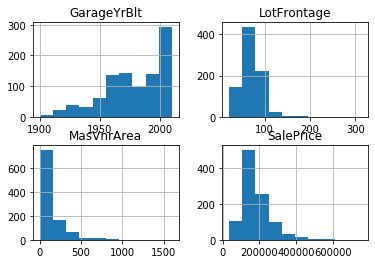

In [55]:
# miremos las distribuciones y determinemos el valor arbitrario a usar

X_train.hist()

In [56]:
pipe = Pipeline([
    ('imputer_999', mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                             variables = ['LotFrontage', 'MasVnrArea'])),
     
    ('imputer_minus1', mdi.ArbitraryNumberImputer(arbitrary_number = -1,
                                          variables = ['GarageYrBlt'])),
     ])

In [57]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_999',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['LotFrontage',
                                                   'MasVnrArea'])),
                ('imputer_minus1',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['GarageYrBlt']))],
         verbose=False)

In [58]:
pipe.named_steps['imputer_999'].arbitrary_number

-999

In [59]:
pipe.named_steps['imputer_minus1'].arbitrary_number

-1

In [60]:
# transformemos los datos con la tuberia o pipeline
tmp = pipe.transform(X_train)

#revisemos que ya no tenemos valores nulos
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
SalePrice      0.000000
dtype: float64

Ya no tenemos mas valores nulos para ninguna de las 3 variables numericas que sustituimos
